In [1]:
import numpy as np
import matplotlib.pyplot as plt

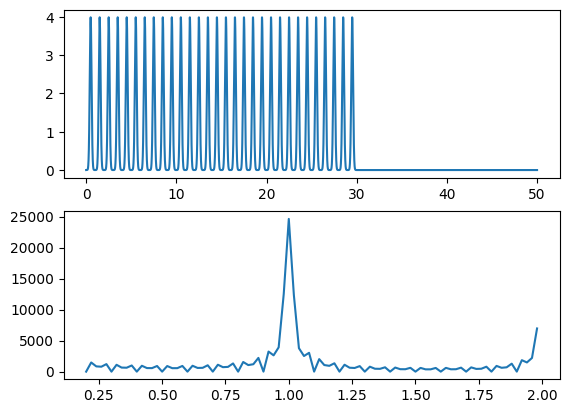

In [165]:
# generate a signal of various lengths depending on the number of peaks

def normal_distribution(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

def generate_signal(n_peaks, width, sample_rate, frequency, duration):
    # generate the time vecto
    t = np.linspace(0, duration, sample_rate*duration)
    sigma = width / 10
    mus = [ width/ 2 + width * i for i in range(n_peaks)]
    signal = np.zeros(len(t))
    for mu in mus:
        signal += normal_distribution(t, mu, sigma)
    return t, signal


t, signal = generate_signal(n_peaks=30, width=1, sample_rate=1000, frequency=1, duration=50)
# fft 
fft = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(len(signal), 1/1000)
# crop on the positive frequencies
n = len(fft)//500
fft = fft[10:n]
fft_freq = fft_freq[10:n]

figure, ax = plt.subplots(2, 1)
ax[0].plot(t , signal)
ax[1].plot(fft_freq, np.abs(fft))